# KBO Baseball Visualization


## 1. 데이터 전처리

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [216]:
data = pd.read_csv('../datacon/2019_kbo_for_kaggle_v2.csv')
data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,3루수,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,우익수,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,우익수,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,3루수,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889


In [217]:
data.columns

Index(['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'GB', 'SO', 'GDP', 'BU', 'fly', 'year',
       'salary', 'war', 'year_born', 'hand2', 'cp', 'tp', '1B', 'FBP', 'avg',
       'OBP', 'SLG', 'OPS', 'p_year', 'YAB', 'YOPS'],
      dtype='object')

#### 결측치 확인

In [218]:
data.isnull().sum()

batter_name     0
age             0
G               0
PA              0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
TB              0
RBI             0
SB              0
CS              0
BB              0
HBP             0
GB              0
SO              0
GDP             0
BU              0
fly             0
year            0
salary          0
war             0
year_born       0
hand2           0
cp              0
tp              0
1B              0
FBP             0
avg            14
OBP            12
SLG            14
OPS            14
p_year          0
YAB             0
YOPS           15
dtype: int64

#### 결측값 있는 행 제거

In [219]:
data.dropna()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,3루수,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,우익수,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,우익수,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,3루수,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889


#### 필요없는 컬럼 제거

- year_born (선수 태어난 연도) : "age(나이)" 항목이 있어서 이 컬럼은 제거합니다.
- cp (최근 포지션) : 공식적인 포지션은 "tp(통합 포지션)" 이므로 이 컬럼은 제거합니다.
- avg(타율)은 통상적으로 "선수가 얼마나 잘하는지"를 나타내는 지표로 쓰이지 않으므로 제거합니다.

In [220]:
del data['year_born']
del data['cp']
del data['avg']

In [221]:
data.head()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,hand2,tp,1B,FBP,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,우투우타,포수,5.0,6.0,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,우투우타,포수,8.0,5.0,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,우투우타,포수,20.0,20.0,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,우투우타,포수,23.0,20.0,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,우투우타,포수,3.0,3.0,0.300,0.176,0.476,2018,47.0,0.691


---

## 2. 포지션 별 연봉 상관관계

### 2-1. 포지션 종류

In [222]:
counts = data['tp'].value_counts()
counts

좌익수     259
포수      247
유격수     238
2루수     234
중견수     232
우익수     230
3루수     213
1루수     187
지명타자     73
Name: tp, dtype: int64

In [223]:
positions = counts.index
positions

Index(['좌익수', '포수', '유격수', '2루수', '중견수', '우익수', '3루수', '1루수', '지명타자'], dtype='object')

좌익수가 가장 많고, 지명타자가 가장 적습니다.

### 2-2. 포지션 별 salary 분포

<AxesSubplot:xlabel='tp', ylabel='salary'>

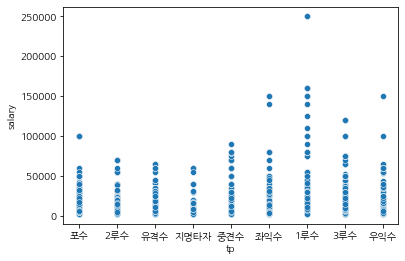

In [224]:
import matplotlib
matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

sns.scatterplot(x = data['tp'], y = data['salary'])

선수가 적은 축에 속한 1루수 선수들이 비교적 높은 연봉을 받고 있음을 알 수 있습니다.

### 2-3. 년도별 연봉 평균 

In [225]:
mean_salary = data[['year', 'tp', 'salary']].groupby(['year', 'tp']).mean()
mean_salary = mean_salary.reset_index()
mean_salary

,year,tp,salary
0,1990,1루수,2400.000000
1,1990,2루수,2400.000000
2,1990,우익수,2400.000000
3,1990,좌익수,2400.000000
4,1990,중견수,2400.000000
...,...,...,...
219,2018,유격수,15154.545455
220,2018,좌익수,20586.666667
221,2018,중견수,16457.894737
222,2018,지명타자,19442.857143


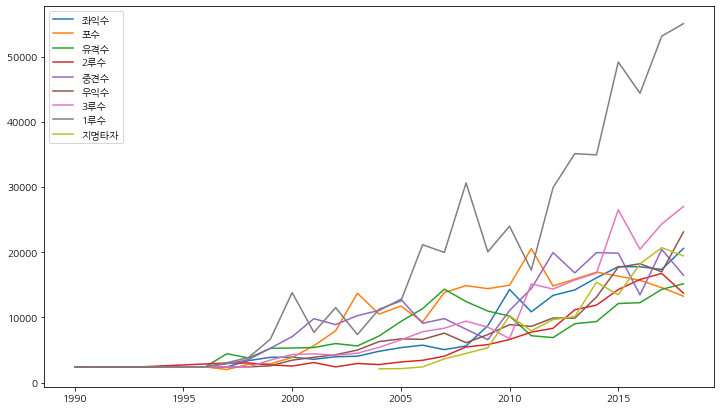

In [226]:
plt.figure(figsize=(12, 7))

for p in positions:
    d = mean_salary[mean_salary['tp'] == p]
    plt.plot(d['year'], d['salary'], label=p)
    
plt.legend()
plt.show()

연봉이 포지션 별로 큰 차이를 가지고 있음을 알 수 있습니다.

따라서 포지션 별 연봉 상관관계를 살펴보면 다음과 같습니다.

### 2-4. 포지션 별 연봉-war/OPS 상관관계 

<Figure size 1296x2160 with 0 Axes>

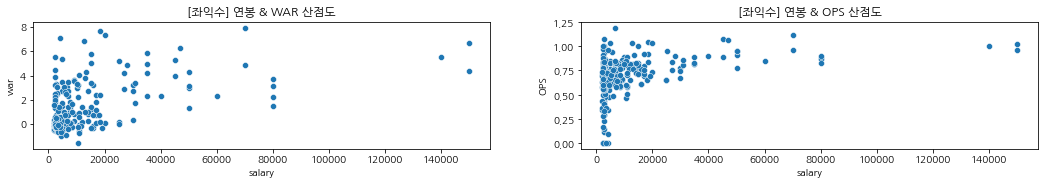

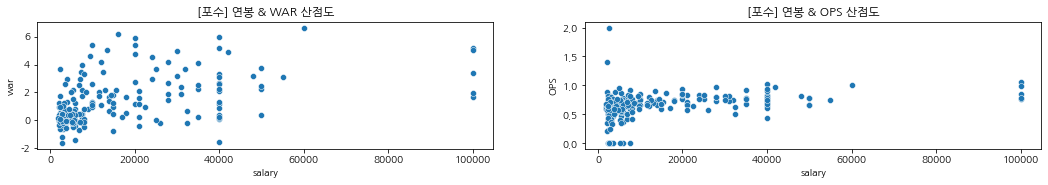

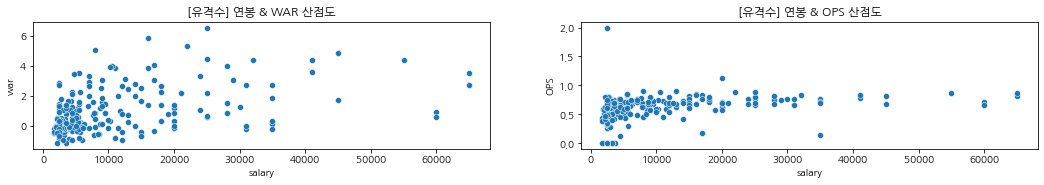

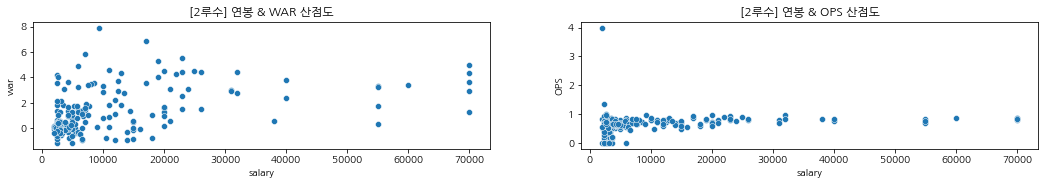

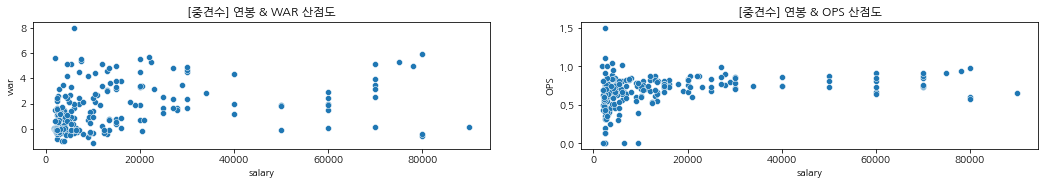

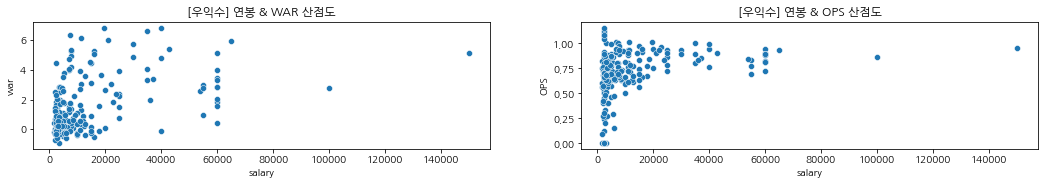

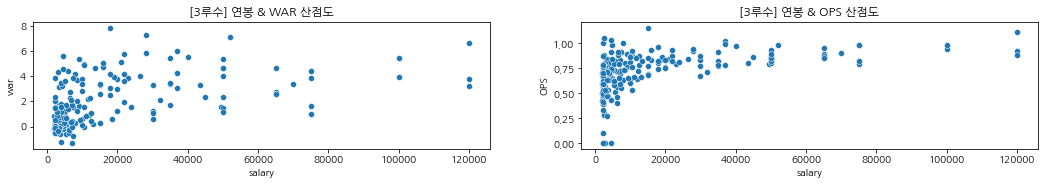

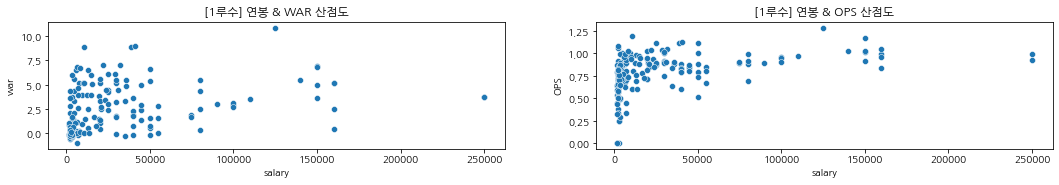

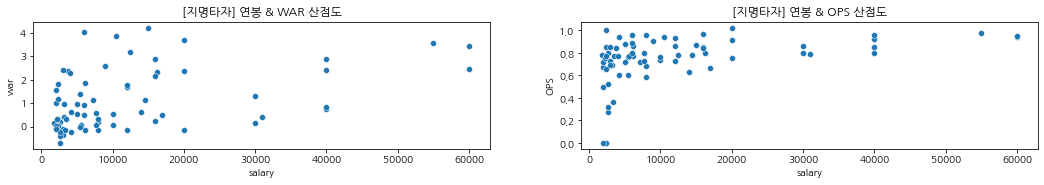

In [371]:
plt.figure(figsize=(18, 30))

for idx, p in enumerate(positions):
    d = data.copy()
    d = d[d['tp'] == p] # 해당 포지션만 분석
    
    plt.figure(figsize=(18, 50))
    plt.subplot(18, 2, idx*2+1)
    plt.title('[' + p + '] 연봉 & WAR 산점도')
    sns.scatterplot(x = d['salary'], y = d['war'])
#     sns.regplot(x='salary', y='war', data=d)
    plt.xlabel('salary')
    plt.ylabel('war')

    plt.subplot(18, 2, idx*2+2)
    plt.title('[' + p + '] 연봉 & OPS 산점도')
    sns.scatterplot(x = d['salary'], y = d['OPS'])
#     sns.regplot(x='salary', y='OPS', data=d)
    plt.xlabel('salary')
    plt.ylabel('OPS')
    
plt.show()

##### 포지션 별 상관관계를 보아도 크게 두드러진 점을 볼 수 없었습니다.

---

## 3. 상승률로 보는 연봉-war/OPS 상관관계


### 3-1. 전년도 war, OPS와 내년 연봉 데이터 채우기

In [227]:
for idx, name in zip(data.index, data.batter_name):
    if idx == 0:
        continue

    previous_name = data.at[idx-1, 'batter_name']
    if name != previous_name:
        continue

    previous_war = data.at[idx-1, 'war']
    data.at[idx, 'previous_war'] = previous_war
    previous_OPS = data.at[idx-1, 'OPS']
    data.at[idx, 'previous_OPS'] = previous_OPS

In [228]:
data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,1B,FBP,OBP,SLG,OPS,p_year,YAB,YOPS,previous_war,previous_OPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,5.0,6.0,0.259,0.250,0.509,2014,79.0,0.580,NaN,NaN
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,8.0,5.0,0.226,0.354,0.580,2015,154.0,0.784,-0.055,0.509
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,20.0,20.0,0.316,0.468,0.784,2016,174.0,0.581,-0.441,0.580
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,23.0,20.0,0.276,0.305,0.581,2017,17.0,0.476,0.783,0.784
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,3.0,3.0,0.300,0.176,0.476,2018,47.0,0.691,-0.405,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,93.0,59.0,0.374,0.493,0.867,2019,395.0,0.768,1.102,0.773
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,44.0,28.0,0.365,0.319,0.684,2018,13.0,0.154,NaN,NaN
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.077,0.077,0.154,2019,188.0,0.720,0.215,0.684
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,57.0,16.0,0.344,0.505,0.849,2016,523.0,0.889,NaN,NaN


In [229]:
for idx, name in zip(data.index, data.batter_name):
    if len(data) == idx+1:
        break
        
    next_name = data.at[idx+1, 'batter_name']
    if name != next_name:
        continue
        
    next_salary = data.at[idx+1, 'salary']
    data.at[idx, 'next_salary'] = next_salary

In [230]:
data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,FBP,OBP,SLG,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,6.0,0.259,0.250,0.509,2014,79.0,0.580,NaN,NaN,2900.0
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,5.0,0.226,0.354,0.580,2015,154.0,0.784,-0.055,0.509,6000.0
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,20.0,0.316,0.468,0.784,2016,174.0,0.581,-0.441,0.580,6000.0
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,20.0,0.276,0.305,0.581,2017,17.0,0.476,0.783,0.784,5500.0
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,3.0,0.300,0.176,0.476,2018,47.0,0.691,-0.405,0.581,5300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,59.0,0.374,0.493,0.867,2019,395.0,0.768,1.102,0.773,NaN
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,28.0,0.365,0.319,0.684,2018,13.0,0.154,NaN,NaN,6200.0
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.077,0.077,0.154,2019,188.0,0.720,0.215,0.684,NaN
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,16.0,0.344,0.505,0.849,2016,523.0,0.889,NaN,NaN,50000.0


### 3-2. 연봉, war, OPS 상승률 계산

- 연봉 : 올해 대비 내년 상승률 
- 연봉 책정 기준이 되는 war, OPS : 작년 대비 올해 상승률

In [232]:
salary_growth = data.apply(lambda d : (d['next_salary'] - d['salary']) / 100, axis=1)
data.loc[:, 'salary_growth_rate'] = salary_growth

war_growth = data.apply(lambda d : d['previous_war'] - d['war'], axis=1)
data.loc[:, 'war_growth_rate'] = war_growth

ops_growth = data.apply(lambda d : d['previous_OPS'] - d['OPS'], axis=1)
data.loc[:, 'ops_growth_rate'] = ops_growth

data

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,0.509,2014,79.0,0.580,NaN,NaN,2900.0,4.0,NaN,NaN
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,0.580,2015,154.0,0.784,-0.055,0.509,6000.0,31.0,0.386,-0.071
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,0.784,2016,174.0,0.581,-0.441,0.580,6000.0,0.0,-1.224,-0.204
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,0.581,2017,17.0,0.476,0.783,0.784,5500.0,-5.0,1.188,0.203
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,0.476,2018,47.0,0.691,-0.405,0.581,5300.0,-2.0,-0.275,0.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,0.867,2019,395.0,0.768,1.102,0.773,NaN,NaN,-2.213,-0.094
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,0.684,2018,13.0,0.154,NaN,NaN,6200.0,31.0,NaN,NaN
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,0.154,2019,188.0,0.720,0.215,0.684,NaN,NaN,0.486,0.530
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,0.849,2016,523.0,0.889,NaN,NaN,50000.0,0.0,NaN,NaN


### 3-3. 상승률이 가장 높은 사람은 어떤 선수일까?

In [233]:
data['salary_growth_rate'].max()

2110.0

In [248]:
data[data['salary_growth_rate'] == 2110]

,index,batter_name,age,G,PA,AB,R,H,2B,3B,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
1337,1337,이대호,28.0,127.0,552.0,478.0,99.0,174.0,13.0,0.0,...,1.111,2011,493.0,1.011,4.836,0.908,250000.0,2110.0,-3.989,-0.203


2011년에 이대호 선수의 연봉 상승률이 2110%로 가장 높습니다. 

### 3-4. 상승률이 0인 선수들도 있을까?

In [238]:
data[data['salary_growth_rate'] == 0]

,index,batter_name,age,G,PA,AB,R,H,2B,3B,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
2,2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,...,0.784,2016,174.0,0.581,-0.441,0.580,6000.0,0.0,-1.224,-0.204
7,7,김민식,26.0,23.0,26.0,24.0,4.0,4.0,0.0,0.0,...,0.398,2016,144.0,0.720,NaN,NaN,3000.0,0.0,NaN,NaN
8,8,김민식,27.0,88.0,170.0,144.0,17.0,37.0,9.0,0.0,...,0.720,2017,352.0,0.576,-0.187,0.398,3000.0,0.0,-0.916,-0.322
14,14,황윤호,22.0,10.0,6.0,5.0,2.0,0.0,0.0,0.0,...,0.167,2016,12.0,0.166,NaN,NaN,2700.0,0.0,NaN,NaN
36,36,이창진,23.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,...,1.500,2015,19.0,0.411,NaN,NaN,2400.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1893,이승엽,37.0,111.0,483.0,443.0,62.0,112.0,24.0,0.0,...,0.693,2014,506.0,0.915,5.469,0.886,80000.0,0.0,5.098,0.193
1895,1895,이승엽,39.0,122.0,522.0,470.0,87.0,156.0,28.0,1.0,...,0.949,2016,542.0,0.898,2.464,0.915,100000.0,0.0,-0.692,-0.034
1900,1900,이원석,22.0,53.0,134.0,120.0,14.0,33.0,7.0,0.0,...,0.653,2009,376.0,0.794,0.709,0.615,6800.0,0.0,0.315,-0.038
1907,1907,이원석,31.0,121.0,459.0,411.0,55.0,109.0,20.0,1.0,...,0.773,2018,479.0,0.867,0.311,1.153,30000.0,0.0,-0.791,0.380


### 3-5. 연봉 상승률과 war, ops의 상관관계

- 상관관계를 보여주도록 NaN인 row는 빼고 상관관계를 살펴보겠습니다.
- previous_war과 next_salary 기준으로 NaN인 행을 제거

In [241]:
data_correlation = data.copy()
data_correlation = data_correlation[pd.notna(data_correlation['previous_war'])]
data_correlation = data_correlation[pd.notna(data_correlation['next_salary'])]
data_correlation = data_correlation.reset_index()
data_correlation

,level_0,index,batter_name,age,G,PA,AB,R,H,2B,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
0,1,1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,...,0.580,2015,154.0,0.784,-0.055,0.509,6000.0,31.0,0.386,-0.071
1,2,2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,...,0.784,2016,174.0,0.581,-0.441,0.580,6000.0,0.0,-1.224,-0.204
2,3,3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,...,0.581,2017,17.0,0.476,0.783,0.784,5500.0,-5.0,1.188,0.203
3,4,4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,...,0.476,2018,47.0,0.691,-0.405,0.581,5300.0,-2.0,-0.275,0.105
4,8,8,김민식,27.0,88.0,170.0,144.0,17.0,37.0,9.0,...,0.720,2017,352.0,0.576,-0.187,0.398,3000.0,0.0,-0.916,-0.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1903,1903,이원석,25.0,110.0,311.0,264.0,36.0,57.0,11.0,...,0.646,2012,325.0,0.731,1.517,0.760,8400.0,-10.0,0.974,0.114
1307,1904,1904,이원석,26.0,107.0,372.0,325.0,36.0,87.0,13.0,...,0.731,2013,264.0,0.858,0.543,0.646,10000.0,16.0,-1.513,-0.085
1308,1905,1905,이원석,27.0,85.0,300.0,264.0,40.0,83.0,12.0,...,0.858,2014,231.0,0.676,2.056,0.731,15000.0,50.0,-0.754,-0.127
1309,1906,1906,이원석,30.0,7.0,22.0,19.0,3.0,6.0,3.0,...,1.153,2017,411.0,0.773,2.810,0.858,30000.0,150.0,2.499,-0.295


#### 연봉 상승률 대비 war, ops의 상관관계

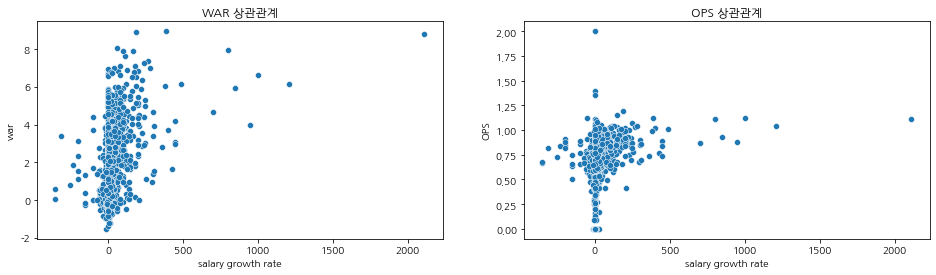

In [291]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('WAR 상관관계')
sns.scatterplot(x = data_correlation['salary_growth_rate'], y = data_correlation['war'])
plt.xlabel('salary growth rate')
plt.ylabel('war')

plt.subplot(122)
plt.title('OPS 상관관계')
sns.scatterplot(x = data_correlation['salary_growth_rate'], y = data_correlation['OPS'])
plt.xlabel('salary growth rate')
plt.ylabel('OPS')
plt.show()

### 3-6. 연봉 상승률과 war, ops 상승률의 상관관계

#### 연봉 상승률 대비 war, ops 상승률의 상관관계

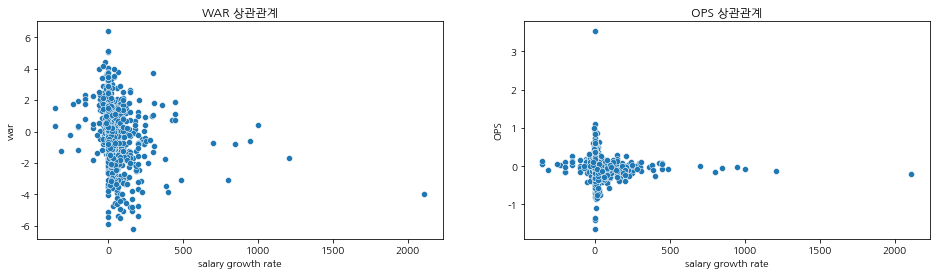

In [292]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('WAR 상관관계')
sns.scatterplot(x = data_correlation['salary_growth_rate'], y = data_correlation['war_growth_rate'])
plt.xlabel('salary growth rate')
plt.ylabel('war')

plt.subplot(122)
plt.title('OPS 상관관계')
sns.scatterplot(x = data_correlation['salary_growth_rate'], y = data_correlation['ops_growth_rate'])
plt.xlabel('salary growth rate')
plt.ylabel('OPS')
plt.show()

### 3-7. 포지션 별 연봉 상승률과 war, ops 상승률의 선형회귀

<Figure size 1296x2160 with 0 Axes>

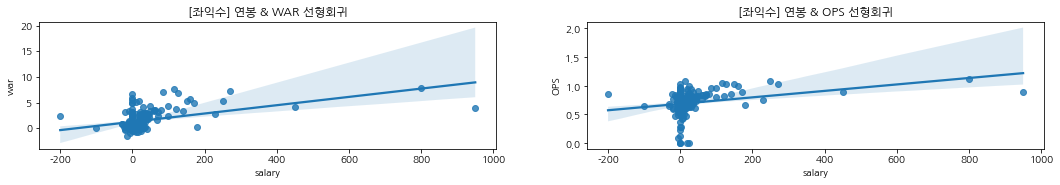

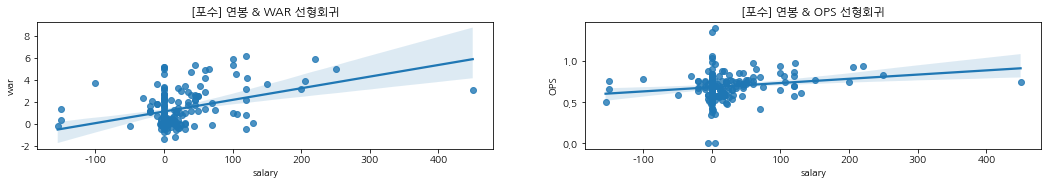

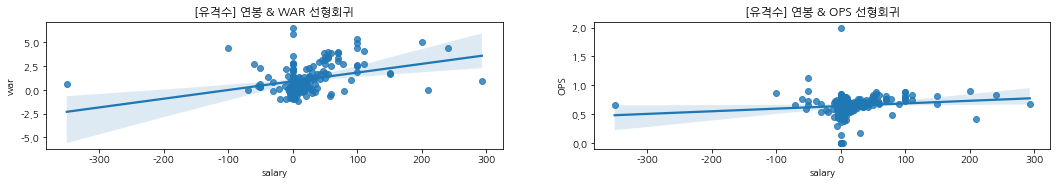

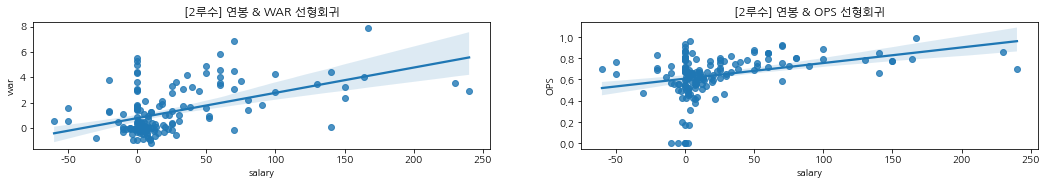

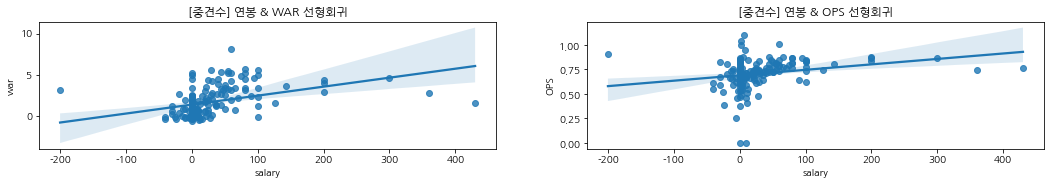

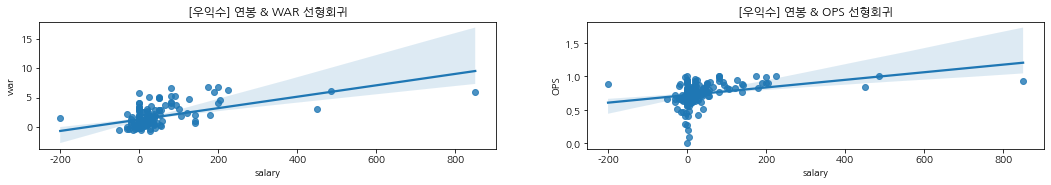

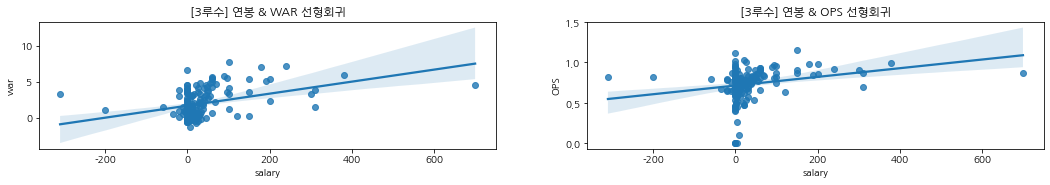

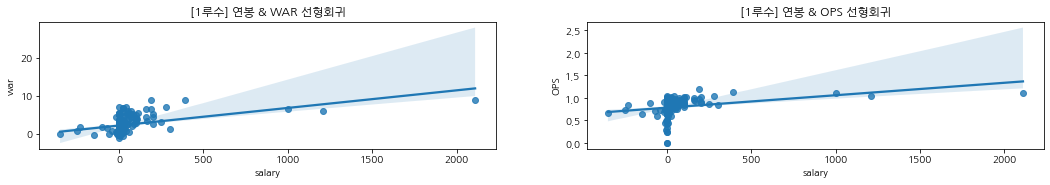

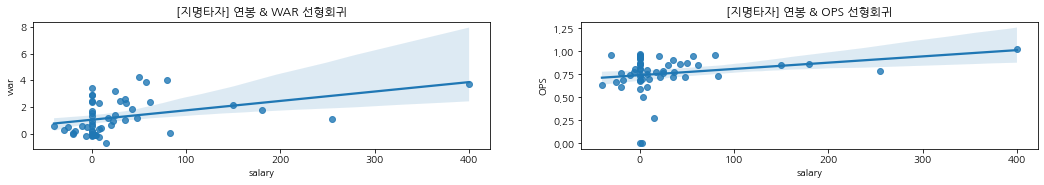

In [372]:
plt.figure(figsize=(18, 30))

for idx, p in enumerate(positions):
    d = data_correlation.copy()
    d = d[d['tp'] == p] # 해당 포지션만 분석
    
    plt.figure(figsize=(18, 50))
    plt.subplot(18, 2, idx*2+1)
    plt.title('[' + p + '] 연봉 & WAR 선형회귀')
    sns.regplot(x='salary_growth_rate', y='war', data=d)
    plt.xlabel('salary')
    plt.ylabel('war')

    plt.subplot(18, 2, idx*2+2)
    plt.title('[' + p + '] 연봉 & OPS 선형회귀')
    sns.regplot(x='salary_growth_rate', y='OPS', data=d)
    plt.xlabel('salary')
    plt.ylabel('OPS')
    
plt.show()

연봉 상승률, 더 나아가 war, ops 상승률로도 확실한 상관관계를 확인하기 어려웠습니다.

이유를 찾아봤을 때, 연봉 책정이 war나 ops외에 복합적인 다른 요소들로 영향을 받고 있기 때문인데요, 

구단 안에 있는 동안에는 성과에 상관없이 고정적으로 연봉이 책정된다는 부분이 가장 큰 것으로 보입니다. 

7년동안 1군에 있어야 FA 계약 기준으로 성과 대비 연봉을 측정할 수 있을거라 가정하여

FA 계약 이후 선수들의 연봉 책정이 어떻게 되는지 살펴보겠습니다.

---

## 4. FA 계약 시점 기준으로 연봉 상관관계 분석

- 데이터 출처 : https://www.koreabaseball.com/Player/Trade.aspx
- KBO 데이터가 2017~2022년만 있기 때문에, 원본 데이터와 겹치는 기간인 2017, 18년 데이터만 가지고 적용해보겠습니다.

### 4-1. FA 계약 선수들만 데이터 필터링

In [258]:
batter_fa_2017 = ('손시헌', '이종욱', '지석훈', '정의윤', '민병헌', '손아섭', '강민호', '문규현')
batter_fa_2018 = ('양의지', '이재원', '최정', '모창민', '최준석', '이대형', '정근우', '김주찬', '채태인')

In [259]:
data_fa = data.copy()

#### 2017년 FA

In [294]:
data_fa_2017 = data.copy()
data_fa_2017 = data_fa_2017[data_fa_2017['year'] == 2017] # 2017년 기준
    
data_fa_2017 = data_fa_2017[data_fa_2017['batter_name'].isin(batter_fa_2017)] # fa_2017에 속한 사람들만 확인

data_fa_2017

,index,batter_name,age,G,PA,AB,R,H,2B,3B,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
426,426,정의윤,31.0,112.0,381.0,349.0,44.0,112.0,16.0,0.0,...,0.863,2018,217.0,0.800,1.791,0.857,30000.0,0.0,0.489,-0.006
815,815,지석훈,33.0,121.0,304.0,268.0,29.0,64.0,16.0,0.0,...,0.684,2018,94.0,0.472,-0.942,0.614,15000.0,1.0,-1.387,-0.070
961,961,강민호,32.0,130.0,515.0,456.0,62.0,130.0,22.0,1.0,...,0.843,2018,427.0,0.788,5.024,0.982,100000.0,0.0,1.641,0.139
1372,1372,민병헌,30.0,123.0,520.0,447.0,73.0,136.0,21.0,0.0,...,0.834,2018,443.0,0.855,4.038,0.891,100000.0,450.0,1.086,0.057
1412,1412,손아섭,29.0,144.0,667.0,576.0,113.0,193.0,35.0,4.0,...,0.934,2018,553.0,0.950,5.150,0.886,150000.0,850.0,-0.799,-0.048
1465,1465,문규현,34.0,110.0,337.0,304.0,38.0,82.0,15.0,2.0,...,0.686,2018,316.0,0.708,1.070,0.675,18000.0,60.0,1.472,-0.011


#### 2018년 FA

In [269]:
data_fa_2018 = data.copy()
data_fa_2018 = data_fa_2018[data_fa_2018['year'] == 2018] # 2018년 기준
    
data_fa_2018 = data_fa_2018[data_fa_2018['batter_name'].isin(batter_fa_2018)] # fa_2018에 속한 사람들만 확인

data_fa_2018

,index,batter_name,age,G,PA,AB,R,H,2B,3B,...,OPS,p_year,YAB,YOPS,previous_war,previous_OPS,next_salary,salary_growth_rate,war_growth_rate,ops_growth_rate
53,53,김주찬,37.0,121.0,471.0,429.0,71.0,146.0,23.0,0.0,...,0.895,2019,337.0,0.714,2.342,0.848,NaN,NaN,0.014,-0.047
501,501,최정,31.0,115.0,489.0,406.0,95.0,99.0,16.0,1.0,...,0.915,2019,503.0,0.918,6.680,1.111,NaN,NaN,2.876,0.196
550,550,이재원,30.0,130.0,471.0,407.0,63.0,134.0,24.0,0.0,...,0.919,2019,451.0,0.717,0.222,0.668,NaN,NaN,-3.912,-0.251
583,583,정근우,36.0,102.0,425.0,375.0,63.0,114.0,24.0,1.0,...,0.838,2019,277.0,0.688,2.884,0.863,NaN,NaN,1.611,0.025
782,782,양의지,31.0,133.0,503.0,439.0,84.0,157.0,29.0,1.0,...,1.012,2019,390.0,1.012,3.162,0.814,NaN,NaN,-3.481,-0.198
825,825,모창민,33.0,81.0,314.0,287.0,38.0,80.0,10.0,1.0,...,0.826,2019,341.0,0.824,2.207,0.846,NaN,NaN,1.637,0.020
1351,1351,채태인,36.0,130.0,420.0,376.0,44.0,110.0,18.0,0.0,...,0.816,2019,167.0,0.709,1.684,0.888,NaN,NaN,1.246,0.072


2017년, 2018년 데이터를 병합합니다.

In [295]:
data_fa_1718 = pd.concat([data_fa_2017, data_fa_2018])

### 4-2. FA 계약 선수 연봉 상관관계 (2017~2018)

#### 2017, 2018년 FA 선수들 연봉과 war, ops 상관관계

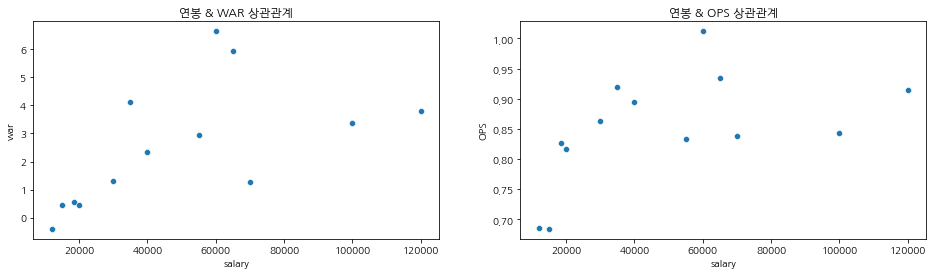

In [323]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('연봉 & WAR 상관관계')
sns.scatterplot(x = data_fa_1718['salary'], y = data_fa_1718['war'])
plt.xlabel('salary')
plt.ylabel('war')

plt.subplot(122)
plt.title('연봉 & OPS 상관관계')
sns.scatterplot(x = data_fa_1718['salary'], y = data_fa_1718['OPS'])
plt.xlabel('salary')
plt.ylabel('OPS')
plt.show()

#### 선형회귀로 보는 상관관계

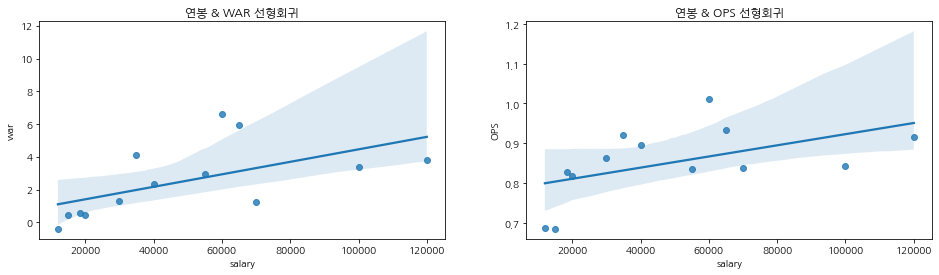

In [324]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('연봉 & WAR 선형회귀')
sns.regplot(x='salary', y='war', data=data_fa_1718)
plt.xlabel('salary')
plt.ylabel('war')

plt.subplot(122)
plt.title('연봉 & OPS 선형회귀')
sns.regplot(x='salary', y='OPS', data=data_fa_1718)
plt.xlabel('salary')
plt.ylabel('OPS')
plt.show()

FA 계약 시점으로 데이터를 살펴봤을 때

이전 상관관계들보다 **연봉**과 **war, OPS**간 상관관계가 다소 있어 보입니다.

다만, FA 계약데이터(외부데이터)가 너무 적어서 많은 데이터 분포를 파악할 수 없고

이로 인해 상관관계 근거로 쓰이기에 부족하다 판단되어 아쉬웠습니다.